In [1]:
import pandas as pd 
import numpy as np 
from scipy.optimize import root 
import matplotlib.pyplot as plt 

from grid_model import GridDataClass, GridModel, ORPDHandler

In [2]:
grid_data = GridDataClass("OPF_grid2.xlsx", f_nom=50)
grid_model = GridModel(grid_data) 


In [3]:
sol = grid_model.powerflow()
sol

P_calc = [  0.99 -20.    20.    20.   -20.  ] MW 
Q_calc = [ 19.685 -10.    -14.678  11.817 -10.   ] Mvar 
V_buses = [1.02   0.9606 1.     1.     0.9574] pu 
d_buses = [ 0.     -2.4668  1.7743  1.1426 -2.8406] deg 

In [17]:
sol.P_calc

array([  0.98987279, -20.        ,  20.        ,  20.        ,
       -20.        ])

In [6]:
sol.d_buses*180/np.pi 

array([ 0.00000000e+00,  5.27035081e-05, -6.10206935e+00])

In [7]:
sol.Q_calc

array([  7.92695321,   5.44175027, -10.        ])

In [8]:
sol.V_buses

array([1.       , 1.00634  , 0.9051283])

In [18]:
sol.get_P_losses()

0.9898727886303398

In [5]:
%timeit grid_model.powerflow()

669 µs ± 18.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [4]:
ORPF_model = ORPDHandler(grid_model, np.array([2, 3]))

In [5]:
sol = ORPF_model.solve_ORPD()
sol 

c:\Users\emelf\OneDrive - USN\PhD - SysOpt\Python Work\Custom Modules\simplepower\simplepower\models\grid_model.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._grid_gens[self._grid_gens["bus_idx"]==idx].at[0, "v_set_pu"] = V_new
c:\Users\emelf\OneDrive - USN\PhD - SysOpt\Python Work\Custom Modules\simplepower\simplepower\models\grid_model.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._grid_gens[self._grid_gens["bus_idx"]==idx].at[0, "v_set_pu"] = V_new
c:\Users\emelf\OneDrive - USN\PhD - SysOpt\Python Work\Custom Modules\simplepower\simplepower\models\grid_model.py:166: SettingWithCopyWarning: 

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.9898727886303398
       x: [ 1.000e+00  1.000e+00]
     nit: 1
     jac: [ 0.000e+00  0.000e+00]
    nfev: 3
    njev: 1

In [5]:
sol.x 

array([1.05, 1.05])

In [6]:
sol.fun 

0.7490032087772249

In [8]:
sol 

 message: Iteration limit reached
 success: False
  status: 9
     fun: 1.865442669420215
       x: [ 7.985e-01  7.390e-01]
     nit: 100
     jac: [-5.175e-03 -7.405e+00]
    nfev: 1172
    njev: 99

In [10]:
V1_vals = np.linspace(0.9, 1.1, 100)
V2_vals = np.linspace(0.9, 1.1, 100)
V1_mesh, V2_mesh = np.meshgrid(V1_vals, V2_vals)

P_loss = np.zeros((100, 100))
func = ORPF_model.get_ORPD_func()

for j, V1 in enumerate(V1_vals): 
    for i, V2 in enumerate(V2_vals): 
        ORPF_model.get_ORPD_func()
        P_loss[i, j] = func(np.array([V1, V2]))

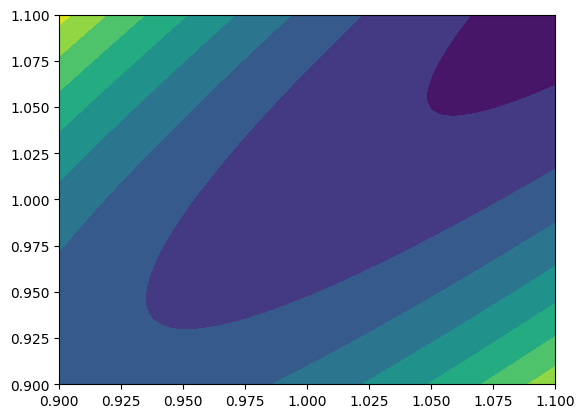

In [11]:
plt.contourf(V1_mesh, V2_mesh, P_loss) 

In [12]:
np.min(P_loss) 

0.6694274347153062

In [7]:
ORPF_model.cons[0]['fun'](np.array([1.0, 1.0]))

-0.19999999999999996

In [26]:
bus_idx = 2
grid_data._grid_gens[grid_data._grid_gens['bus_idx'] == bus_idx]["v_set_pu"]

,name,S_rated_mva,v_set_pu,p_set_mw,bus_idx,is_slack
1,G1,100.0,1.0,20.0,2.0,0.0


In [6]:
data = grid_data._grid_gens

In [13]:
data.__setitem__("v_set_pu", 1.0)

In [16]:
data.at[0, "v_set_pu"] = 1.02 
data 

,name,S_rated_mva,v_set_pu,p_set_mw,bus_idx,is_slack,0
0,slack,1000.0,1.02,NaN,0.0,1.0,NaN
1,G1,100.0,1.00,20.0,2.0,0.0,NaN
2,G2,100.0,1.00,20.0,3.0,0.0,NaN
v_set_pu,NaN,NaN,NaN,NaN,NaN,NaN,1.02


In [11]:
data[data["bus_idx"]==0].at[0, "bus_idx"]

0.0

In [9]:
data.where(data['bus_idx']==2)

,name,S_rated_mva,v_set_pu,p_set_mw,bus_idx,is_slack
0,NaN,NaN,NaN,NaN,NaN,NaN
1,G1,100.0,1.0,20.0,2.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data.iloc[0]

name           slack
S_rated_mva     1000
v_set_pu        1.02
p_set_mw         NaN
bus_idx            0
is_slack           1
Name: 0, dtype: object